In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [32]:
x_train = pd.read_csv(r"A:\Data Science\Project\\x_train.csv")
x_test = pd.read_csv(r"A:\Data Science\Project\\x_test.csv")
y_train = pd.read_csv(r"A:\Data Science\Project\\y_train.csv")
y_test = pd.read_csv(r"A:\Data Science\Project\\y_test.csv")

In [33]:
x_train

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
0,315793,2,20,32,5,0,1,1,0,0,...,0,0,0,0,0,2,0,0,0,2
1,103347,1,21,22,42,1,0,0,1,1,...,0,0,0,0,0,13,0,1,0,1
2,373340,0,4,26,85,1,0,0,0,1,...,0,0,0,0,0,10,0,2,1,2
3,324006,4,13,25,24,1,0,0,1,0,...,0,0,0,0,0,10,0,0,0,1
4,248759,3,16,50,11,0,0,0,1,0,...,0,0,0,0,0,3,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,312924,5,23,19,6,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
39996,291893,0,15,22,4,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
39997,221546,3,6,25,43,0,0,0,0,1,...,0,0,0,0,0,4,6,0,0,0
39998,116320,4,13,27,4,1,0,1,0,0,...,0,0,0,0,0,2,0,0,0,0


In [4]:
train_userID = x_train["user"]
x_train.drop(columns = "user", inplace = True)
test_userID = x_test["user"]
x_test.drop(columns = "user", inplace = True)

In [5]:
print("x_train = ",x_train.shape)
print("x_test = ",x_test.shape)
print("y_train = ",y_train.shape)
print("y_test = ",y_test.shape)

x_train =  (40000, 48)
x_test =  (10000, 48)
y_train =  (40000, 1)
y_test =  (10000, 1)


# Feature scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

# Model Building

In [7]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = "entropy", random_state = 51)
dt_model.fit(x_train,y_train)
y_pred_dt = dt_model.predict(x_test)
accuracy_score(y_test,y_pred_dt)

0.7178

In [9]:
dt_model2 = DecisionTreeClassifier(criterion = "entropy", random_state = 51)
dt_model2.fit(x_train_sc,y_train)
y_pred_dt_sc = dt_model2.predict(x_test_sc)
accuracy_score(y_test,y_pred_dt_sc)

0.7178

# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
accuracy_score(y_test,y_pred_knn)

C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6938

In [11]:
knn_model2 = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
knn_model2.fit(x_train_sc, y_train)
y_pred_knn_sc = knn_model2.predict(x_test_sc)
accuracy_score(y_test,y_pred_knn_sc)

C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7375

# Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
y_pred_nb = nb_model.predict(x_test)
accuracy_score(y_test,y_pred_nb)

C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7001

In [13]:
nb_model2 = GaussianNB()
nb_model2.fit(x_train_sc,y_train)
y_pred_nb_sc = nb_model2.predict(x_test_sc)
accuracy_score(y_test,y_pred_nb_sc)

C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7001

# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state =0)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
 
accuracy_score(y_test, y_pred_rf)

C:\Users\Naman\AppData\Local\Temp\ipykernel_6376\2467819702.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


0.7575

In [15]:
rf_model2 = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state =0)
rf_model2.fit(x_train_sc, y_train)
y_pred_rf_sc = rf_model.predict(x_test_sc)
 
accuracy_score(y_test, y_pred_rf_sc)

C:\Users\Naman\AppData\Local\Temp\ipykernel_6376\2254303266.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model2.fit(x_train_sc, y_train)
C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.4985

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0, penalty = "l2")
lr_model.fit(x_train,y_train)
y_pred_lr = lr_model.predict(x_test)
accuracy_score(y_test, y_pred_lr)

C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7506

In [17]:
lr_model2 = LogisticRegression(random_state = 0, penalty = "l2")
lr_model2.fit(x_train_sc,y_train)
y_pred_lr_sc = lr_model.predict(x_test_sc)
accuracy_score(y_test, y_pred_lr_sc)

C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6304

# Support Vector Machine

In [18]:
#from sklearn.svm import SVC
#svc_model = SVC()
#svc_model.fit(x_train, y_train)
#y_pred_svc = svc_model.predict(x_test)
#accuracy_score(y_test, y_pred_svc)

In [19]:
#svc_model2 = SVC()
#svc_model2.fit(x_train_sc, y_train)
#y_pred_svc_sc = svc_model2.predict(x_test_sc)
#accuracy_score(y_test, y_pred_svc_sc)

# XGBoost

In [20]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
accuracy_score(y_test, y_pred_xgb)

0.7828

In [21]:
xgb_model2 = XGBClassifier()
xgb_model2.fit(x_train_sc, y_train)
y_pred_xgb_sc = xgb_model2.predict(x_test_sc)
accuracy_score(y_test, y_pred_xgb_sc)

0.7828

In [22]:
#xgb_model_pt1 = XGBClassifier(
#learning_rate = 0.01,
#n_estimators = 5000,
#max_depth = 4,
#min_depth = 4,
#min_child_weight = 6,
#gamma = 0,
#subsample = 0.8,
#colsample_bytree = 0.8,
#reg_alpha = 0.005,
#objective = "binary:logistic",
#nthread = 4,
#scale_pros_weight = 1,
#seed = 27)
#xgb_model_pt1.fit(x_train,y_train)
#y_pred_xgb_pt1 = xgb_model_pt1.predict(x_test)
#accuracy_score(y_test, y_pred_xgb_pt1)

In [23]:
xgb_model_pt2 = XGBClassifier(
learning_rate = 0.01,
n_estimators = 5000,
max_depth = 4,
min_depth = 4,
min_child_weight = 6,
gamma = 0,
subsample = 0.8,
colsample_bytree = 0.8,
reg_alpha = 0.005,
objective = "binary:logistic",
nthread = 4,
scale_pros_weight = 1,
seed = 27)
xgb_model_pt2.fit(x_train_sc,y_train)
y_pred_xgb_sc_pt2 = xgb_model_pt2.predict(x_test_sc)
accuracy_score(y_test, y_pred_xgb_sc_pt2)

[21:34:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_depth", "scale_pros_weight" } are not used.



0.7886

# Confusion Matrix

Text(0.5, 1.0, 'confusion Matrix')

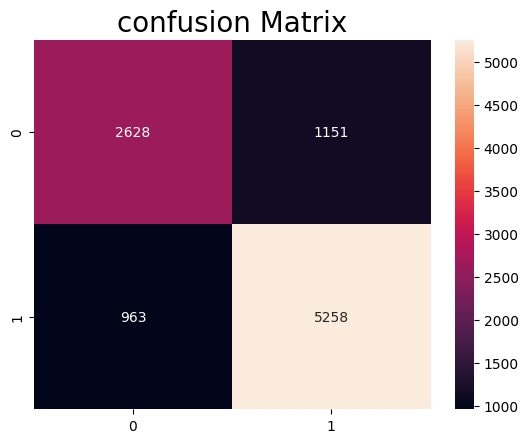

In [35]:
cm_xgb_pt2 = confusion_matrix(y_test, y_pred_xgb_sc_pt2)
sns.heatmap(cm_xgb_pt2, annot = True, fmt = "g")
plt.title("confusion Matrix", fontsize = 20)

In [36]:
cr_xgb_pt2 = classification_report(y_test, y_pred_xgb_sc_pt2)
print("Classification report >>> \n", cr_xgb_pt2)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.73      0.70      0.71      3779
           1       0.82      0.85      0.83      6221

    accuracy                           0.79     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.79      0.79      0.79     10000



In [38]:
#from sklearn.model_selection import cross_val_score
#cross_validation = cross_val_score(estimator = xgb_model_pt2, X = x_train_sc, y = y_train, cv = 10)
#print("cross validation of xgboost model = ", cross_validation)
#print("cross validation of xgboost model (in mean) = ", cross_validation.mean())

# Mapping predicted output to the target

In [28]:
final_result = pd.concat([test_userID, y_test], axis = 1)
final_result["predicted result"] = y_pred_xgb_sc_pt2
final_result

,user,enrolled,predicted result
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,0
...,...,...,...
9995,143036,1,1
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1


# save the model

In [39]:
import pickle
pickle.dump(xgb_model_pt2,open( "Fintech_app_ML_model.pickle","wb"))
ml_model = pickle.load(open("Fintech_app_ML_model.pickle","rb"))
y_pred = ml_model.predict(x_test_sc)
cm = confusion_matrix(y_test,y_pred)
print("confusion matrix = \n",cm)
print("Accuracy of model = ", accuracy_score(y_test, y_pred))

confusion matrix = 
 [[2628 1151]
 [ 963 5258]]
Accuracy of model =  0.7886


In [30]:
import joblib
joblib.dump(xgb_model_pt2,"Fintech_app_ML_model.joblib")
ml_model_jl = joblib.load("Fintech_app_ML_model.joblib")
y_pred_jl = ml_model_jl.predict(x_test_sc)
cm_jl = confusion_matrix(y_test, y_pred_jl)
print("confusion matrix = \n", cm_jl)
print("Acurracy of model = ",accuracy_score(y_test, y_pred_jl))

confusion matrix = 
 [[2628 1151]
 [ 963 5258]]
Acurracy of model =  0.7886
